In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")

In [9]:
print(corona_dataset_csv.head(10))

                 Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/21/20  \
0        0        0        0        0        0        0  ...     1092   
1        0        0        0

In [10]:
corona_dataset_csv.drop(['Lat', 'Long'], axis=1, inplace=True)

In [11]:
corona_dataset_aggregated = corona_dataset_csv.groupby('Country/Region').sum()

C:\Users\Jojo\AppData\Local\Temp\ipykernel_131660\610729016.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggregated = corona_dataset_csv.groupby('Country/Region').sum()


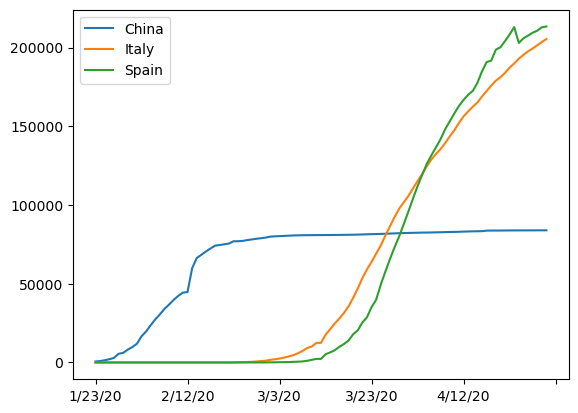

In [12]:
corona_dataset_aggregated.loc['China'][1:].plot(label='China')
corona_dataset_aggregated.loc['Italy'][1:].plot(label='Italy')
corona_dataset_aggregated.loc['Spain'][1:].plot(label='Spain')
plt.legend()
plt.show()

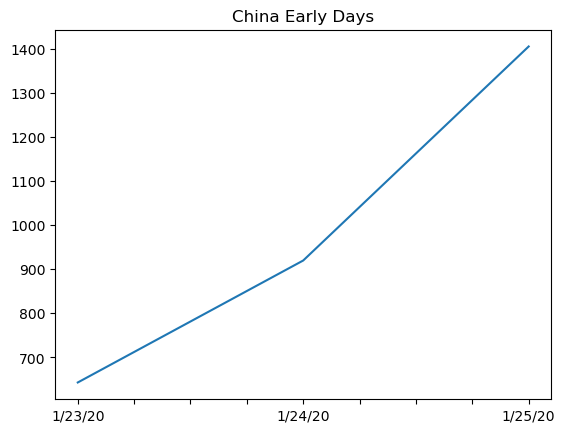

In [13]:
corona_dataset_aggregated.loc['China'][1:4].plot(title='China Early Days')
plt.show()

In [14]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_rate = corona_dataset_aggregated.loc[c].diff().max()
    max_infection_rates.append(max_rate)


In [15]:
corona_dataset_aggregated['max_infection_rates'] = max_infection_rates

In [16]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max_infection_rates'])
print(corona_data.head())

                max_infection_rates
Country/Region                     
Afghanistan                   232.0
Albania                        34.0
Algeria                       199.0
Andorra                        43.0
Angola                          5.0


In [17]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [18]:
happiness_report_csv.set_index("Country or region", inplace=True)
print(happiness_report_csv.head())

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Finland                       1  7.769           1.340           1.587   
Denmark                       2  7.600           1.383           1.573   
Norway                        3  7.554           1.488           1.582   
Iceland                       4  7.494           1.380           1.624   
Netherlands                   5  7.488           1.396           1.522   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Finland                              0.986                         0.596   
Denmark                              0.996                         0.592   
Norway                               1.028                         0.603   
Iceland                              1.026                         0.591   
Netherlands              

In [19]:
data = corona_data.join(happiness_report_csv, how='inner')
print(data.head())

             max_infection_rates  Overall rank  Score  GDP per capita  \
Afghanistan                232.0           154  3.203           0.350   
Albania                     34.0           107  4.719           0.947   
Algeria                    199.0            88  5.211           1.002   
Argentina                  291.0            47  6.086           1.092   
Armenia                    134.0           116  4.559           0.850   

             Social support  Healthy life expectancy  \
Afghanistan           0.517                    0.361   
Albania               0.848                    0.874   
Algeria               1.160                    0.785   
Argentina             1.432                    0.881   
Armenia               1.055                    0.815   

             Freedom to make life choices  Generosity  \
Afghanistan                         0.000       0.158   
Albania                             0.383       0.178   
Algeria                             0.086       0.073

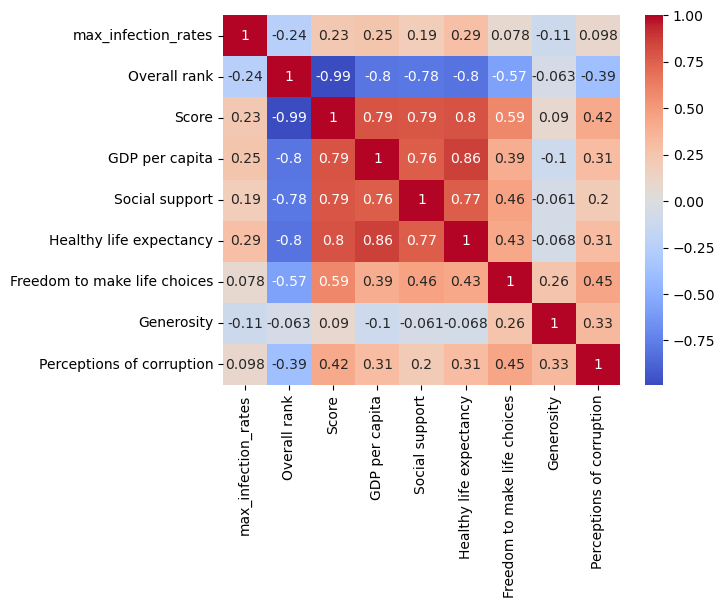

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()